## 1. Импорт данных.

In [242]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


## Определение задачи

y
0    128
1     91
Name: count, dtype: int64


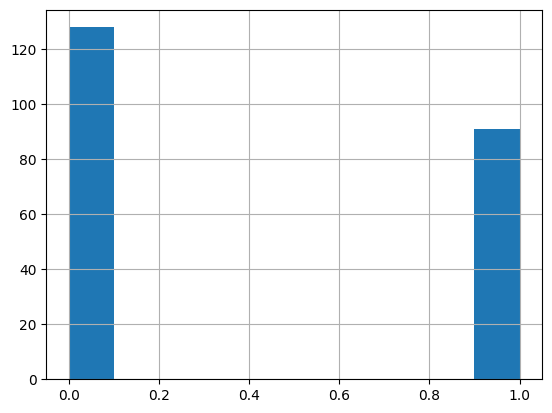

In [243]:
data['y'].hist()
unique_y_count = data['y'].nunique()
frequency = data['y'].value_counts()
print(frequency)

Задача представляет собой задачу бинарной классификации, где выходная переменная принимает значение 0 или 1 в зависимости от того, станет ли студент предпринимателем

## 3. Предобработка данных

Преобразуем параметр KeyTraits с помощью One Hot Encoder

In [244]:
data = pd.get_dummies(data, columns=['KeyTraits'], dtype=int)
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,...,SelfConfidence,GoodPhysicalHealth,MentalDisorder,ReasonsForLack,y,KeyTraits_Passion,KeyTraits_Positivity,KeyTraits_Resilience,KeyTraits_Vision,KeyTraits_Work Ethic
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,...,2,3,Yes,NaN,1,1,0,0,0,0
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,...,3,4,Yes,Just not interested! (Want to work in the corp...,0,0,0,0,1,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,...,4,4,No,Not willing to start a venture in India and wa...,0,1,0,0,0,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,...,3,3,No,Not able to take a Financial Risk,0,0,0,1,0,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,...,3,2,Yes,NaN,1,0,0,0,1,0


Аналогично с помощью One Hot Encoder преобразуем EducationSector

In [245]:
data = pd.get_dummies(data, columns=['EducationSector'], dtype=int)
data.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
0,No,19,Male,Yes,No,2,2,3,3,2,...,0,0,0,1,0,0,0,0,0,0
1,Yes,22,Male,No,Yes,3,3,3,4,4,...,0,0,0,1,0,0,0,0,0,0
2,No,18,Male,Yes,No,3,4,3,3,3,...,0,0,0,1,0,0,0,0,0,0
3,Yes,20,Male,Yes,Yes,3,3,3,3,4,...,0,0,0,1,0,0,0,0,0,0
4,Yes,19,Male,Yes,Yes,2,3,3,3,4,...,0,0,0,1,0,0,0,0,0,0


Отделим столбец выходной переменной, уберем параметр ReasonsForLack и разделим выборку на обучающую и тестовую

In [246]:
from sklearn.model_selection import train_test_split
import numpy as np

y = data['y']
x = data.drop(['y'], axis=1)
x = x.drop(['ReasonsForLack'], axis=1)


data_train, data_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

data_train.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
11,Yes,19,Male,Yes,Yes,3,3,4,4,5,...,0,0,1,0,0,0,0,0,0,0
69,No,19,Male,Yes,Yes,2,2,3,3,3,...,0,0,0,1,0,0,0,0,0,0
156,Yes,19,Male,Yes,Yes,4,5,5,5,5,...,0,0,0,0,0,0,0,0,1,0
3,Yes,20,Male,Yes,Yes,3,3,3,3,4,...,0,0,0,1,0,0,0,0,0,0
13,No,21,Male,Yes,Yes,4,3,4,4,5,...,0,0,0,1,0,0,0,0,0,0


Преобразуем категориальные переменные и заменим пропуски в значениях в столбце ReasonsForLack

In [247]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_train['IndividualProject'] = le.fit_transform(data_train['IndividualProject'])
data_test['IndividualProject'] = le.transform(data_test['IndividualProject'])

data_test.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
163,1,21,Male,No,Yes,2,2,3,3,3,...,0,1,0,0,0,0,0,0,0,0
215,1,19,Male,Yes,No,2,2,2,2,2,...,1,0,0,1,0,0,0,0,0,0
136,0,20,Male,Yes,No,1,2,1,2,3,...,0,0,1,0,0,0,0,0,0,0
194,0,20,Male,Yes,Yes,4,4,4,5,4,...,1,0,0,1,0,0,0,0,0,0
187,0,21,Female,No,Yes,3,1,2,3,2,...,0,0,0,0,0,0,0,0,1,0


In [248]:
le = LabelEncoder()

data_train['Gender'] = le.fit_transform(data_train['Gender'])
data_test['Gender'] = le.transform(data_test['Gender'])

data_test.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
163,1,21,1,No,Yes,2,2,3,3,3,...,0,1,0,0,0,0,0,0,0,0
215,1,19,1,Yes,No,2,2,2,2,2,...,1,0,0,1,0,0,0,0,0,0
136,0,20,1,Yes,No,1,2,1,2,3,...,0,0,1,0,0,0,0,0,0,0
194,0,20,1,Yes,Yes,4,4,4,5,4,...,1,0,0,1,0,0,0,0,0,0
187,0,21,0,No,Yes,3,1,2,3,2,...,0,0,0,0,0,0,0,0,1,0


In [249]:
le = LabelEncoder()

data_train['City'] = le.fit_transform(data_train['City'])
data_test['City'] = le.transform(data_test['City'])

In [250]:
le = LabelEncoder()

data_train['Influenced'] = le.fit_transform(data_train['Influenced'])
data_test['Influenced'] = le.transform(data_test['Influenced'])


In [251]:
le = LabelEncoder()

data_train['MentalDisorder'] = le.fit_transform(data_train['MentalDisorder'])
data_test['MentalDisorder'] = le.transform(data_test['MentalDisorder'])

In [252]:
data_train.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
11,1,19,1,1,1,3,3,4,4,5,...,0,0,1,0,0,0,0,0,0,0
69,0,19,1,1,1,2,2,3,3,3,...,0,0,0,1,0,0,0,0,0,0
156,1,19,1,1,1,4,5,5,5,5,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,1,1,3,3,3,3,4,...,0,0,0,1,0,0,0,0,0,0
13,0,21,1,1,1,4,3,4,4,5,...,0,0,0,1,0,0,0,0,0,0


In [253]:
data_test.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
163,1,21,1,0,1,2,2,3,3,3,...,0,1,0,0,0,0,0,0,0,0
215,1,19,1,1,0,2,2,2,2,2,...,1,0,0,1,0,0,0,0,0,0
136,0,20,1,1,0,1,2,1,2,3,...,0,0,1,0,0,0,0,0,0,0
194,0,20,1,1,1,4,4,4,5,4,...,1,0,0,1,0,0,0,0,0,0
187,0,21,0,0,1,3,1,2,3,2,...,0,0,0,0,0,0,0,0,1,0


# LogisticRegression

In [254]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, accuracy_score

c:\Users\polin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.72


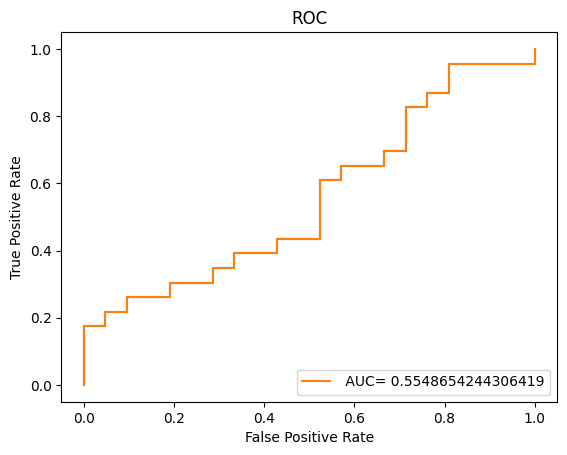

f1: 0.375
accuracy: 0.5454545454545454


In [279]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(data_train, y_train)

y_pred = logreg.predict(data_test)

y_score = logreg.predict_proba(data_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)


precision, recall, thresholds = precision_recall_curve(y_test, y_score)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

accuracy_train = accuracy_score(y_train, logreg.predict(data_train))
print(accuracy_train)

plt.plot (fpr,tpr)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC')
plt.show() 

print("f1: {f1}".format(f1=f1))
print("accuracy: {accuracy}".format(accuracy=accuracy))


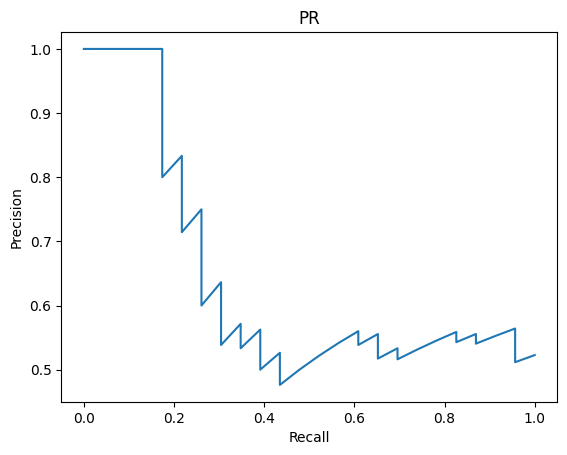

In [280]:
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR')
plt.show() 

# DecisionTreeClassifier

Поставим максимальную глубину равную 8

0.8571428571428571


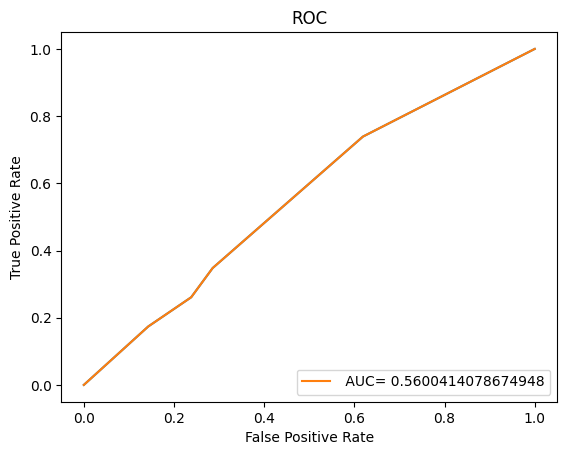

f1: 0.35294117647058826
accuracy: 0.5


In [274]:
from sklearn.tree import DecisionTreeClassifier

destree = DecisionTreeClassifier(max_depth=5)
destree.fit(data_train, y_train)

y_pred = destree.predict(data_test)
y_score = destree.predict_proba(data_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)


precision, recall, thresholds = precision_recall_curve(y_test, y_score)


f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

accuracy_train = accuracy_score(y_train, destree.predict(data_train))
print(accuracy_train)

plt.plot (fpr,tpr)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show() 

print("f1: {f1}".format(f1=f1))
print("accuracy: {accuracy}".format(accuracy=accuracy))

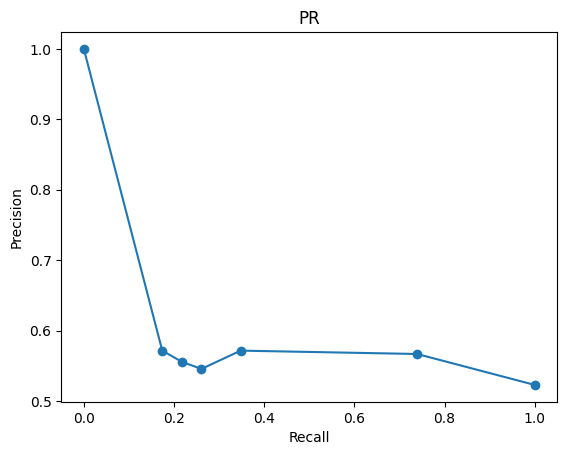

In [275]:
plt.plot (recall, precision, marker='o')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR')
plt.show() 

Изменим максимальную глубину на 2

0.6857142857142857


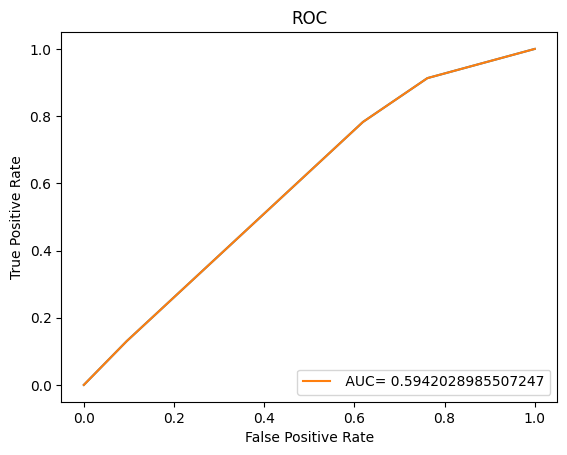

f1: 0.21428571428571427
accuracy: 0.5


In [278]:
from sklearn.tree import DecisionTreeClassifier

destree = DecisionTreeClassifier(max_depth=2)
destree.fit(data_train, y_train)

y_pred = destree.predict(data_test)
y_score = destree.predict_proba(data_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

precision, recall, thresholds = precision_recall_curve(y_test, y_score)


f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

accuracy_train = accuracy_score(y_train, destree.predict(data_train))
print(accuracy_train)

plt.plot (fpr,tpr)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show() 

print("f1: {f1}".format(f1=f1))
print("accuracy: {accuracy}".format(accuracy=accuracy))

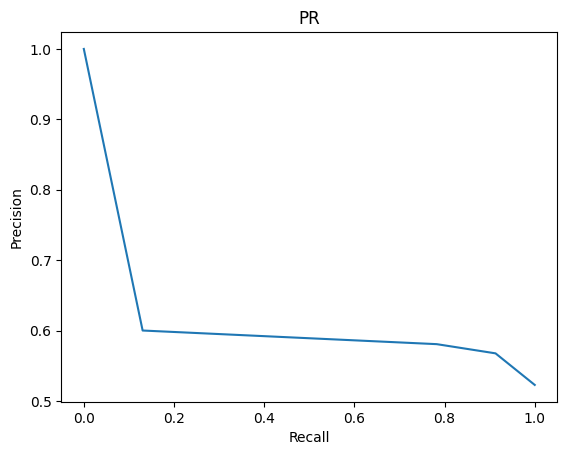

In [260]:
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR')
plt.show() 

# KNeighborsClassifier

0.7371428571428571


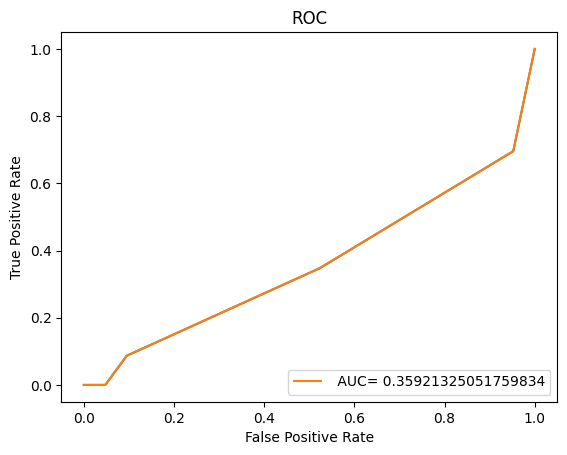

f1: 0.38095238095238093
accuracy: 0.4090909090909091


In [272]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(data_train, y_train)

y_pred = knc.predict(data_test)
y_score = knc.predict_proba(data_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)


precision, recall, thresholds = precision_recall_curve(y_test, y_score)


f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

accuracy_train = accuracy_score(y_train, knc.predict(data_train))
print(accuracy_train)

plt.plot (fpr,tpr)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show() 

print("f1: {f1}".format(f1=f1))
print("accuracy: {accuracy}".format(accuracy=accuracy))

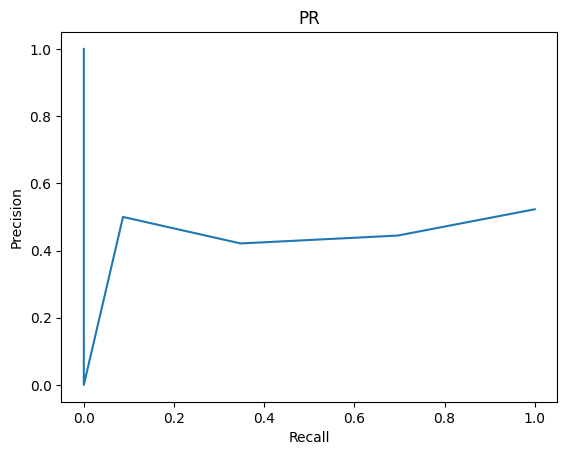

In [262]:
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR')
plt.show() 

Изменим n_neighbors

0.6457142857142857


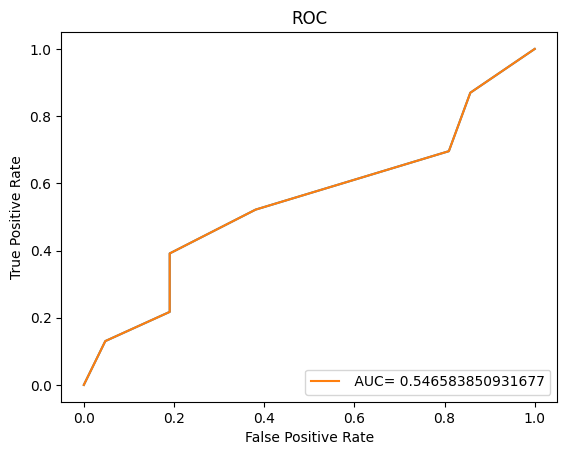

f1: 0.3125
accuracy: 0.5


In [271]:
knc = KNeighborsClassifier(n_neighbors=21)
knc.fit(data_train, y_train)

y_pred = knc.predict(data_test)
y_score = knc.predict_proba(data_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

precision, recall, thresholds = precision_recall_curve(y_test, y_score)


f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, knc.predict(data_train))
print(accuracy_train)

plt.plot (fpr,tpr)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show() 

print("f1: {f1}".format(f1=f1))
print("accuracy: {accuracy}".format(accuracy=accuracy))

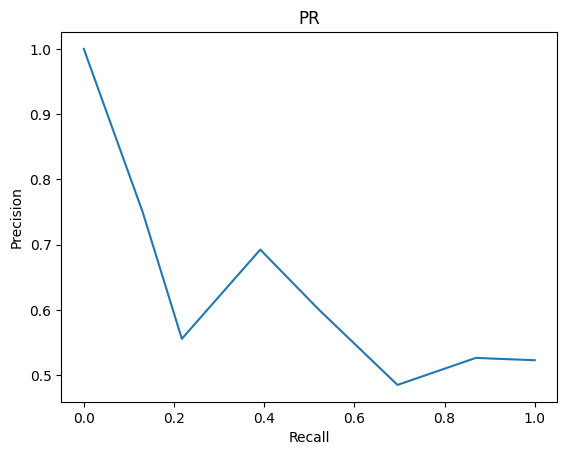

In [264]:
plt.plot (recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR')
plt.show() 

# RandomForestClassifier

1.0


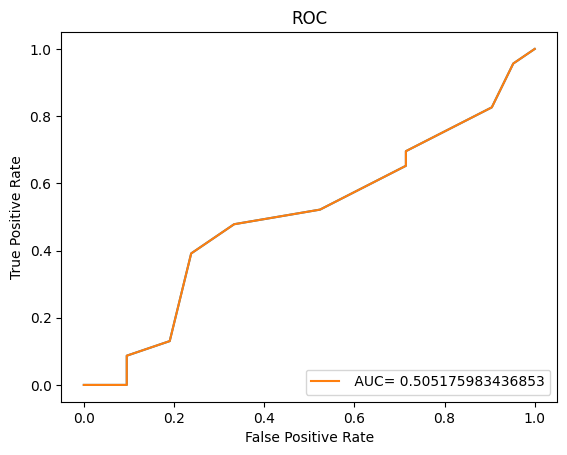

f1: 0.4864864864864865
accuracy: 0.5681818181818182


In [267]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=17)
rfc.fit(data_train, y_train)

y_pred = rfc.predict(data_test)
y_score = rfc.predict_proba(data_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)


precision, recall, thresholds = precision_recall_curve(y_test, y_score)


f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, rfc.predict(data_train))
print(accuracy_train)

plt.plot (fpr,tpr)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show() 

print("f1: {f1}".format(f1=f1))
print("accuracy: {accuracy}".format(accuracy=accuracy))

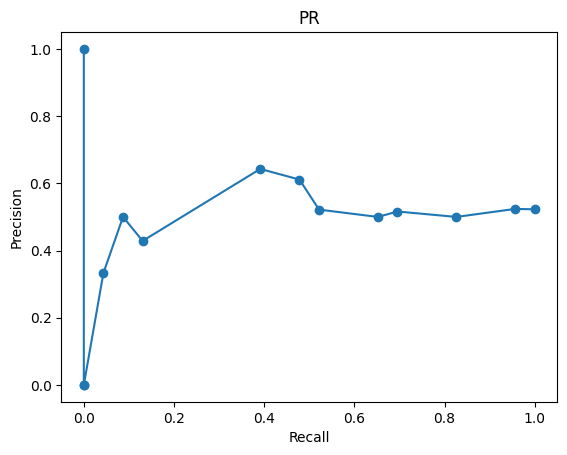

In [268]:
plt.plot (recall, precision, marker = 'o')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR')
plt.show() 